In [23]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.loading import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Make plots of chosen variables
# Overlay will be circulation 
# For consistency, we make the plotting as a function
#

def _make_phase_composite_plots(shading_var, cmap, norm, levels, circulation_overlay=True):
    for phase in range(1, 9):
        fig, ax = plt.subplots()

        var = load_phase_composite(shading_var, phase=phase)
        var = var.coarsen({'column': 5}).mean()
        var.plot.contourf(ax=ax, y='z', cmap=cmap, norm=norm, levels=levels)

        if circulation_overlay:
            circ = load_phase_composite_anomaly('wa', phase=phase).cumsum('column')
            circ = circ.coarsen({'column': 5}).mean()
            circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors='black')

        ax.set_ylim(0, 17e3)
        ax.set_ylabel('Altitude [m]')
        ax.set_xlabel('Column Rank')
        
                

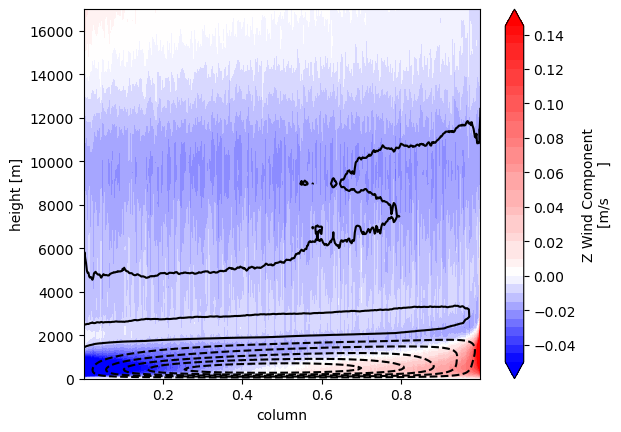

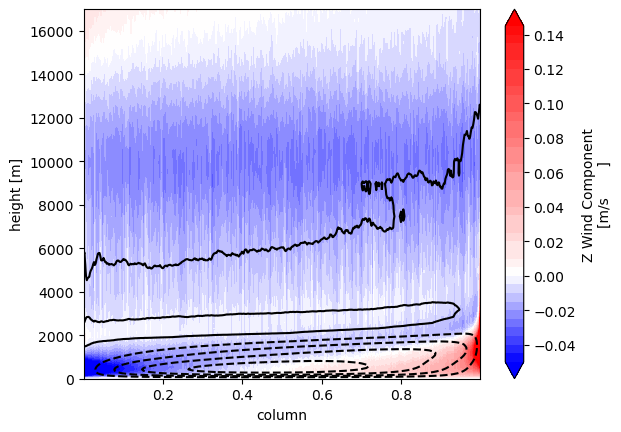

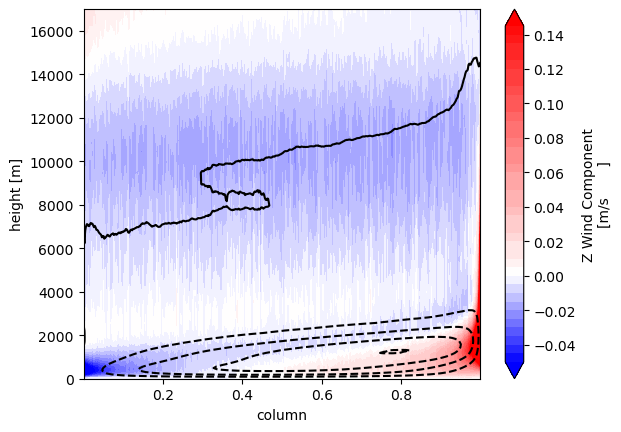

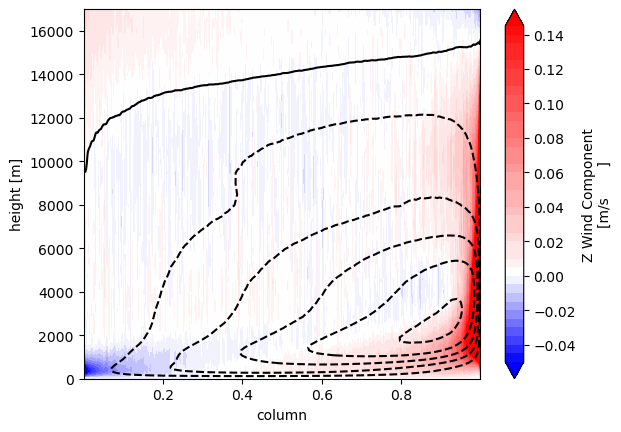

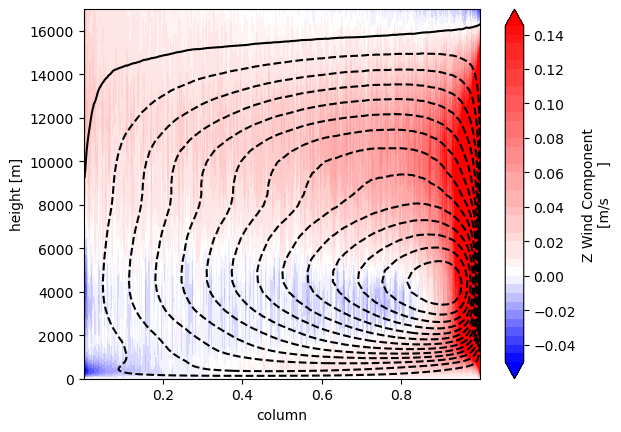

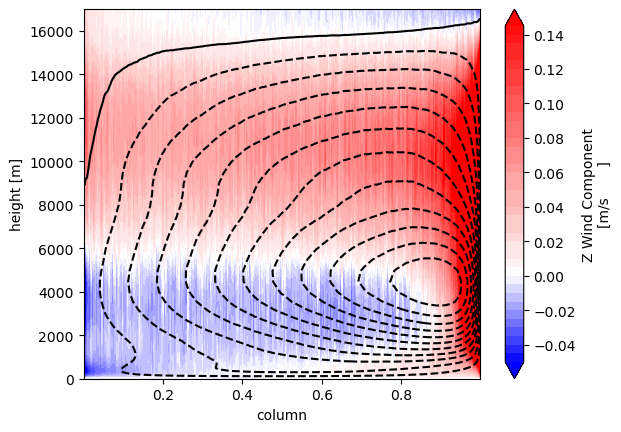

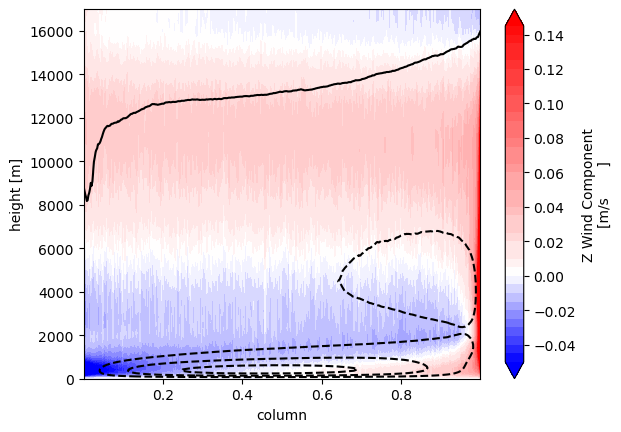

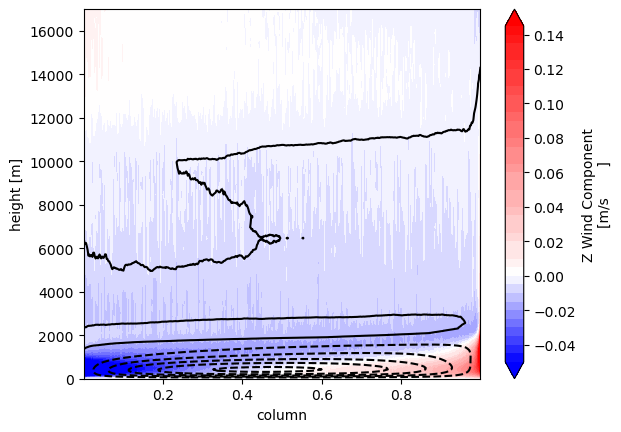

In [56]:
# Vertical velocity
#
_make_phase_composite_plots(
    shading_var='wa',
    cmap=plt.cm.bwr, 
    norm=colors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.15),
    levels=np.arange(-0.05, 0.15, 0.005),
     circulation_overlay=True
)